# Manual strategy
ML for trading Udacity Course exercise

More info:
https://quantsoftware.gatech.edu/Manual_strategy

A transcription of the Udacity Course lectures can be find on https://docs.google.com/document/d/1ELqlnuTSdc9-MDHOkV0uvSY4RmI1eslyQlU9DgOY_jc/edit?usp=sharing

Kairoart 2018
"""


## Overview

In this project you will develop a trading strategy using your intuition and Technical Analysis, and test it against a stock using your market simulator. In a later project, you will use your same indicators but with Machine Learning (instead of your intuition) to create a trading strategy. We hope Machine Learning will do better than your intuition, but who knows? 

## Data Details, Dates and Rules

* For your report, trade only the symbol JPM. This will enable us to more easily compare results.
* You may use data from other symbols (such as SPY) to inform your strategy.
* The in sample/development period is January 1, 2008 to December 31 2009.
* The out of sample/testing period is January 1, 2010 to December 31 2011.
* Starting cash is 100,000.
* Allowable positions are 1000 shares long, 1000 shares short, 0 shares.
* Benchmark: The performance of a portfolio starting with 100,000 cash, investing in 1000 shares of JPM and holding that position.
* There is no limit on leverage.
* Transaction costs for ManualStrategy: Commission: 9.95, Impact: 0.005.
* Transaction costs for TheoreticallyOptimalStrategy: Commission: 0.00, Impact: 0.00.



## Task

Your code that implements your indicators as functions that operate on dataframes. The code should generate the charts that illustrate your indicators in the report.

**Indicators**

We'll use three tecnical indicators:
* Bolliner Bands.
* Simple Moving Average (SMA)
* Relative Strength Index (RSI)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
%matplotlib inline


# Add parent directory PATH for looking for modules,
import sys
#sys.path.insert(0,'..')
from util import get_data, plot_data

# Add plotly for interactive charts
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

## Part 1: Technical Indicators

Develop and describe at least 3 and at most 5 technical indicators. You may find our lecture on time series processing to be helpful. For each indicator you should create a single, compelling chart that illustrates the indicator.

As an example, you might create a chart that shows the price history of the stock, along with "helper data" (such as upper and lower bollinger bands) and the value of the indicator itself. Another example: If you were using price/SMA as an indicator you would want to create a chart with 3 lines: Price, SMA, Price/SMA. In order to facilitate visualization of the indicator you might normalize the data to 1.0 at the start of the date range (i.e. divide price[t] by price[0]).

Your report description of each indicator should enable someone to reproduce it just by reading the description. We want a written description here, not code, however, it is OK to augment your written description with a pseudocode figure.

At least one of the indicators you use should be completely different from the ones presented in our lectures. (i.e. something other than SMA, Bollinger Bands, RSI). 

### Bollinger Bands

In [ ]:
"""Bollinger Bands."""

def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    #values.rolling(window).mean
    return values.rolling(window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # todo: Compute and return rolling standard deviation
    #return pd.rolling_std(values, window=window)
    return values.rolling(window).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    # 2 standard deviations aboav the mean.
    # add 2 times the rolling standard deviations of the mean 2*std.

    upper_band = rm + 2 * rstd
    lower_band = rm - 2 * rstd

    return upper_band, lower_band 


def test_run(plotly=False):
    # Read data
    dates = pd.date_range('2008-01-01', '2009-12-31')
    symbols = ['JPM']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_JPM = get_rolling_mean(df['JPM'], window=10)

    # 2. Compute rolling standard deviation
    rstd_JPM = get_rolling_std(df['JPM'], window=10)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_JPM, rstd_JPM)
    
    if plotly==False:
        # Plot raw JPM values, rolling mean and Bollinger Bands
        plt.figure(figsize=(16,8))

        ax = df['JPM'].plot(title="Bollinger Bands", label='JPM')
        rm_JPM.plot(label='Rolling mean', ax=ax)
        upper_band.plot(label='upper band', ax=ax)
        lower_band.plot(label='lower band', ax=ax)

        # Add axis labels and legend
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        ax.legend(loc='upper left')
        plt.show()
    else:
        trace_symbol = go.Scatter(
                x=df.index,
                y=df['JPM'],
                name = "JPM",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

        trace_upper = go.Scatter(
                x=df.index,
                y=upper_band,
                name = "Upper band",
                line = dict(color = '#04B404'),
                opacity = 0.8)
        
        trace_lower = go.Scatter(
                x=df.index,
                y=lower_band,
                name = "Lower band",
                line = dict(color = '#FF0000'),
                opacity = 0.8)
        
        trace_Rolling = go.Scatter(
                x=df.index,
                y=rm_JPM,
                name = "Rolling Mean",
                line = dict(color = '#FF8000'),
                opacity = 0.8)
        
        data = [trace_symbol, trace_upper, trace_lower, trace_Rolling]

        layout = dict(
            title = "Bollinger Bands",
            xaxis = dict(
                    title='Dates',
                    rangeselector=dict(
                        buttons=list([
                            dict(count=1,
                                 label='1m',
                                 step='month',
                                 stepmode='backward'),
                            dict(count=6,
                                 label='6m',
                                 step='month',
                                 stepmode='backward'),
                            dict(step='all')
                        ])
                    ),
                    range = [dates.values[0], dates.values[1]]),
            
            yaxis = dict(
                    title='Price')
                    
            )
        
        

        fig = dict(data=data, layout=layout)
        iplot(fig)

In [ ]:
test_run(True)

#### Description

**Type**
It's a volatility indicator.

**Bollinger bands:**

* It's a volatity indicator.
* Measures the “highness” or “lowness” of price, relative to previous trades.
* The idea is to add a band 2 standard deviations above and 2 standard deviations below (upper band and lower band).

**Buy signal**

If we drop below the lower band and then up back through it, that is potentially right there a buy signal, because the hypothesis there is that we've gone quite far from the simple moving average. And we're now moving back towards it. if you buy there, you should anticipate positive returns as it climbs back through the average.


**Sell signal**

Where you see it punch through the upper band and then go back down through, that's potentially a sell signal.



### Simple moving average (SMA)


In [ ]:
"""Simple moving average (SMA)"""

def SMA(values, window): 
    """Return Simple moving average of given values, using specified window size."""
    sma = pd.Series(values.rolling(window,center=False).mean()) 
    q = (sma / values) - 1 
    return sma, q

def test_run(plotly=False):
    # Read data
    dates = pd.date_range('2008-01-01', '2009-12-31')
    symbols = ['JPM']
    df = get_data(symbols, dates)

    # 1. Normalize the prices Dataframe
    normed = pd.DataFrame()
    for column in df:
        normed[column] = df[column].values / df[column].iloc[0];

    # 2. Compute SMA
    sma_JPM, q = SMA(normed[column], window=10)

    if plotly==False:
        # Plot raw JPM values, rolling mean and Bollinger Bands
        plt.figure(figsize=(16,8))

        ax = normed[column].plot(title="Simple Moving Average ", label='JPM')
        sma_JPM.plot(label='SMA', ax=ax)
        

        # Add axis labels and legend
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        ax.legend(loc='upper left')
        plt.show()
    else:
        trace_symbol = go.Scatter(
                x=df.index,
                y=normed[column],
                name = "JPM",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

        trace_sma = go.Scatter(
                x=df.index,
                y=sma_JPM,
                name = "SMA",
                line = dict(color = '#FF8000'),
                opacity = 0.8)
        
        trace_q = go.Scatter(
                x=df.index,
                y=q,
                name = "SMA Quantity",
                line = dict(color = '#04B404'),
                opacity = 0.8)
        
        data = [trace_symbol, trace_sma, trace_q]

        layout = dict(
            title = "Simple Moving Average (SMA)",
            xaxis = dict(
                    title='Dates',
                    rangeselector=dict(
                        buttons=list([
                            dict(count=1,
                                 label='1m',
                                 step='month',
                                 stepmode='backward'),
                            dict(count=6,
                                 label='6m',
                                 step='month',
                                 stepmode='backward'),
                            dict(step='all')
                        ])
                    ),
                    range = [dates.values[0], dates.values[1]]),
            
            yaxis = dict(
                    title='Price')
                    
            )
        
        

        fig = dict(data=data, layout=layout)
        iplot(fig)

In [ ]:
test_run(True)

#### Description

The moving average is one of the most widely used technical indicators. It is used along with other technical indicators or it can form the building block for the computation of other technical indicators.

A “moving average” is average of the asset prices over the “x” number of days/weeks. The term “moving” is used because the group of data moves forward with each new trading day. For each new day, we include the price of that day and exclude the price of the first day in the data sequence.

**Type**
It's a trend indicator.

**Estimation**

To compute a 10-day window SMA, we take the sum of prices over 10 days and divide it by 10. To arrive at the next data point for the 20-day SMA, we include the price of the next trading day while excluding the price of the first trading day. This way the group of data moves forward.

The SMA assigns equal weights to each price point in the group. 

**Analysis**

The moving average tells whether a trend has begun, ended or reversed. The averaging of the prices produces a smoother line which makes it easier to identify the underlying trend. However, the moving average lags the market action.

A shorter moving average is more sensitive than a longer moving average. However, it is prone to generate false trading signals.

**Signals**

When the *closing price moves above the moving average, a buy signal is generated and vice versa*.  When using a single moving average one should select the averaging period in such a way that it is sensitive in generating trading signals and at the same time insensitive in giving out false signals.

**Quantifying**

We lso need a way to quantify it, to turn it into a number.
The way we do that is to compare the current price with the current simple moving average, and construct a ratio.
So, if, for instance, the price is 10% above the simple moving average, we'd end up getting a positive 0.1.
If it were 10% below, we'd get a negative 0.1.


### Relative Strength Index (RSI)

In [ ]:
"""Relative Strength Index (RSI)"""

def RSI(price, n=14):
    """Return Relative Strength Index (RSI) of given values, using specified window size."""
    gain = (price-price.shift(1)).fillna(0) # calculate price gain with previous day, first row nan is filled with 0

    def rsiCalc(p):
        # subfunction for calculating rsi for one lookback period
        avgGain = p[p>0].sum()/n
        avgLoss = -p[p<0].sum()/n 
        rs = avgGain/avgLoss
        return 100 - 100/(1+rs)

    # run for all periods with rolling_apply
    return pd.rolling_apply(gain,n,rsiCalc) 

def test_run(plotly=False):
    # Read data
    dates = pd.date_range('2008-01-01', '2009-12-31')
    symbols = ['JPM']
    df = get_data(symbols, dates)

    # Compute RSI
    rsi_JPM = RSI(df['JPM'])

    if plotly==True:
        # Plot
        # Price line
        trace_symbol = go.Scatter(
                x=df.index,
                y=df['JPM'],
                name = "JPM",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

        # RSI line
        trace_rsi = go.Scatter(
                x=df.index,
                y=rsi_JPM,
                name = "RSI",
                line = dict(color = '#FF8000'),
                opacity = 0.8)

        # Overbought line
        trace_ob = go.Scatter(
                x=df.index,
                y=np.repeat(70, len(df)),
                name = "Overbought",
                line = dict(color = '#04B404',
                           dash = 'dash')
                )
        # Oversold line
        trace_os = go.Scatter(
                x=df.index,
                y=np.repeat(30, len(df)),
                name = "Oversold",
                line = dict(color = '#FF0000',
                           dash = 'dash')
                )


        # Subplots
        fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('JPM Prices', 'Relative Strength Index (RSI)'))
        fig.append_trace(trace_symbol, 1, 1)
        fig.append_trace(trace_ob, 2, 1)
        fig.append_trace(trace_os, 2, 1)
        fig.append_trace(trace_rsi, 2, 1)
        layout = dict(
            xaxis = dict(
                    title='Dates',
                    range = [dates.values[0], dates.values[1]]),

            yaxis = dict(
                    title='Price')

            )



        fig['layout'].update(height=600, title='Overbought-Oversold')
        iplot(fig)

In [ ]:
test_run(True)

#### Description

The Relative Strength Index - RSI is a momentum indicator that measures the magnitude of recent price changes to analyze [overbought](https://www.investopedia.com/terms/o/overbought.asp) or [oversold](https://www.investopedia.com/terms/o/oversold.asp) conditions. It is primarily used to attempt to identify overbought or oversold conditions in the trading of an asset.

**Type**
It's a momentum indicator.

**Estimation**
The relative strength index (RSI) is calculated using the following formula:

RSI = 100 - 100 / (1 + RS)

Where RS = Average gain of up periods during the specified time frame / Average loss of down periods during the specified time frame

The RSI provides a relative evaluation of the strength of a security's recent price performance, thus making it a momentum indicator. RSI values range from 0 to 100. The default time frame for comparing up periods to down periods is 14, as in 14 trading days.

**Analisys**
Taking the prior value plus the current value is a smoothing technique similar to that used in calculating an exponential moving average. This also means that RSI values become more accurate as the calculation period extends. To exactly replicate our RSI numbers, a formula will need at least 250 data points.

The formula normalizes RS and turns it into an oscillator that fluctuates between zero and 100. In fact, a plot of RS looks exactly the same as a plot of RSI. The normalization step makes it easier to identify extremes because RSI is range bound. RSI is 0 when the Average Gain equals zero. Assuming a 14-period RSI, a zero RSI value means prices moved lower all 14 periods. There were no gains to measure. RSI is 100 when the Average Loss equals zero. This means prices moved higher all 14 periods. There were no losses to measure. 

**Signals**
* RSI values of 70 or above indicate that a security is becoming overbought or overvalued, and therefore, may be primed for a trend reversal or corrective [pullback](https://www.investopedia.com/terms/p/pullback.asp in price.
* RSI reading of 30 or below is commonly interpreted as indicating an oversold or undervalued condition that may signal a trend change or corrective price reversal to the upside.

# Part 2: Theoretically Optimal Strategy

Assume that you can see the future, but that you are constrained by the portfolio size and order limits as specified above. Create a set of trades that represents the best a strategy could possibly do during the **in sample period**. The reason we're having you do this is so that you will have an idea of an upper bound on performance.

The intent is for you to use adjusted close prices with the market simulator that you wrote earlier in the course. For this activity, use 0.00, and 0.0 for commissions and impact respectively.

**Main functions**

* *Indicators:* Your code that implements your indicators as functions that operate on dataframes. The "main" code in indicators should generate the charts that illustrate your indicators in the report.
* *Marketsimcode:* An improved version of your marketsim code that accepts a "trades" data frame (instead of a file). More info on the trades data frame below.
* *ManualStrategy:* Code implementing a ManualStrategy object (your manual strategy). It should implement testPolicy() which returns a trades data frame (see below). The main part of this code should call marketsimcode as necessary to generate the plots used in the report.
* *TheoreticallyOptimalStrategy:* Code implementing a TheoreticallyOptimalStrategy object (details below). It should implement testPolicy() which returns a trades data frame (see below). The main part of this code should call marketsimcode as necessary to generate the plots used in the report.

Provide a chart that reports:

    * Benchmark (see definition above) normalized to 1.0 at the start: Blue line
    * Value of the theoretically optimal portfolio (normalized to 1.0 at the start): Black line

You should also report in text:

    * Cumulative return of the benchmark and portfolio
    * Stdev of daily returns of benchmark and portfolio
    * Mean of daily returns of benchmark and portfolio

Your code should implement testPolicy() as follows:

df_trades = tos.testPolicy(symbol = "AAPL", sd=dt.datetime(2010,1,1), ed=dt.datetime(2011,12,31), sv = 100000) 

**Input parameters**

    * symbol: the stock symbol to act on
    * sd: A datetime object that represents the start date
    * ed: A datetime object that represents the end date
    * sv: Start value of the portfolio

**Output result**

df_trades: A data frame whose values represent trades for each day. Legal values are +1000.0 indicating a BUY of 1000 shares, -1000.0 indicating a SELL of 1000 shares, and 0.0 indicating NOTHING. Values of +2000 and -2000 for trades are also legal so long as net holdings are constrained to -1000, 0, and 1000.




## Import libraries

In [2]:
# For Theoritically Optimal Strategy
from marketsim import market_simulator
from best_strategy import BestPossibleStrategy

## Starting cash and symbol of interest

In [3]:
# Specify the start and end dates for this period.
start_val = 100000
symbol = "JPM"

## In-sample or training period performance

Create a set of trades that represents the best a strategy could possibly do during the **in sample period**

Chart:
    * Benchmark (see definition above) normalized to 1.0 at the start: Blue line
    * Value of the theoretically optimal portfolio (normalized to 1.0 at the start): Black line

Report:
    * Cumulative return of the benchmark and portfolio
    * Stdev of daily returns of benchmark and portfolio
    * Mean of daily returns of benchmark and portfolio

Performances during training period for JPM
Date Range: 2008-01-01 00:00:00 to 2009-12-31 00:00:00
Cumulative Return of Portfolio: 2.8329
Cumulative Return of Benchmark : 0.012299999999999978

Standard Deviation of Portfolio: 0.00461522467764988
Standard Deviation of Benchmark : 0.017004366271213767

Average Daily Return of Portfolio: 0.0026906386767000376
Average Daily Return of Benchmark : 0.00016808697819094035



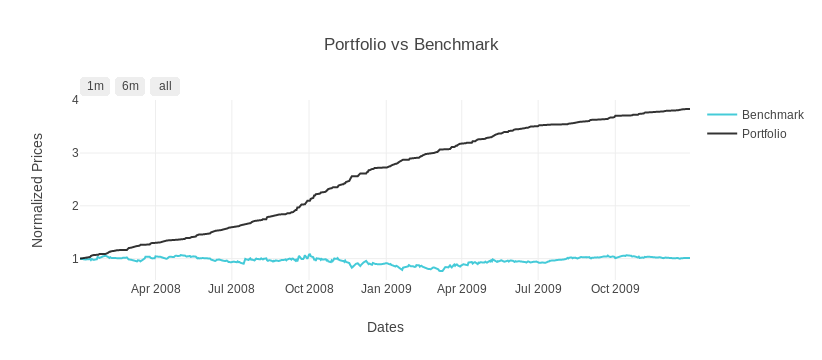

In [7]:
# Start and end dates for this period
start_d = dt.datetime(2008, 1, 1)
end_d = dt.datetime(2009, 12, 31)

# Get benchmark data
benchmark_prices = get_data([symbol], pd.date_range(start_d, end_d), 
    addSPY=False).dropna()

# Create benchmark trades: buy 1000 shares of symbol, hold them till the last date
df_benchmark_trades = pd.DataFrame(
    data=[(benchmark_prices.index.min(), symbol, "BUY", 1000), 
    (benchmark_prices.index.max(), symbol, "SELL", 1000)], 
    columns=["Date", "Symbol", "Order", "Shares"])
df_benchmark_trades.set_index("Date", inplace=True)

best_poss = BestPossibleStrategy()
df_trades = best_poss.test_policy(symbol=symbol, start_date=start_d, end_date=end_d)

# Retrieve performance stats via a market simulator
print ("Performances during training period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_d, end_d))
market_simulator(df_trades, df_benchmark_trades, start_val=start_val, commission=0, 
    impact=0)


# Part 3: Manual Rule-Based Trader

## Import libraries

In [ ]:
# For Manual Rule-Based Trader
from marketsim import market_simulator
from indicators import get_momentum, get_sma_indicator, get_bollinger_bands, \
compute_bollinger_value, plot_momentum, plot_sma_indicator, plot_bollinger
import rule_based_strategy as rbs

## Starting cash and symbol of interest

In [ ]:
start_val = 100000
symbol = "JPM"

## In-sample performance

Show the performances of portfolio and benchmark in the in-sample period.

### Specify the start and end dates for this period.

In [ ]:
start_d = dt.datetime(2008, 1, 1)
end_d = dt.datetime(2009, 12, 31)

### Get benchmark data

In [ ]:
benchmark_prices = get_data([symbol], pd.date_range(start_d, end_d), addSPY=False).dropna()

### Create benchmark trades

Buy 1000 shares of symbol, hold them till the last date

In [ ]:
df_benchmark_trades = pd.DataFrame(
        data=[(benchmark_prices.index.min(), symbol, "BUY", 1000), 
        (benchmark_prices.index.max(), symbol, "SELL", 1000)], 
        columns=["Date", "Symbol", "Order", "Shares"])
df_benchmark_trades.set_index("Date", inplace=True)
df_benchmark_trades